<a href="https://colab.research.google.com/github/chrisldz/ECON3916-33674-Statistical-Machine-Learning/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
# Manual DGP Simulation
import numpy as np
normal_traffic = np.random.randint(20, 50, 980)
spike_traffic = np.random.randint(1000, 5000, 20)
latency_logs = np.concatenate([normal_traffic, spike_traffic])

In [51]:
def calculate_mad(data):
    # 1. Calculate the Median of the data
    median = np.median(data)
    # 2. Calculate Absolute Deviations (|x - median|)
    deviations = np.abs(data - median)
    # 3. Return the Median of those deviations
    mad = np.median(deviations)

    return mad

In [52]:
sd = np.std(latency_logs)
mad = calculate_mad(latency_logs)

print("Standard Deviation:", sd)
print("MAD:", mad)

Standard Deviation: 419.62864368272096
MAD: 8.0


The Standard Deviation increases a lot because it squares the deviations, so the 20 extreme spike values (1000–5000ms) dominate the calculation.
The MAD stays stable because it is based on the median and absolute differences, so it is not heavily affected by extreme outliers.


In [53]:
def bayesian_audit(prior, sensitivity, specificity):
    numerator = prior * sensitivity
    denominator = (prior * sensitivity) + ((1 - prior) * (1 - specificity))
    posterior = numerator / denominator

    return posterior

In [54]:
print("Bootcamp:", bayesian_audit(0.5, 0.98, 0.98))
print("Econ Class:", bayesian_audit(0.05, 0.98, 0.98))
print("Honors Seminar:", bayesian_audit(0.001, 0.98, 0.98))


Bootcamp: 0.98
Econ Class: 0.7205882352941175
Honors Seminar: 0.04675572519083965


In [55]:
observed = np.array([50250, 49750])
expected = np.array([50000, 50000])

In [56]:
chi_square = 0

for i in range(len(observed)):
    chi_square += (observed[i] - expected[i])**2 / expected[i]

print("Chi-Square:", chi_square)

Chi-Square: 2.5


In [57]:
if chi_square > 3.84:
    print("Experiment is INVALID (SRM detected)")
else:
    print("Experiment is valid")

Experiment is valid


=== Survivorship Bias Audit ===
Tokens launched (df_all): 10000
Survivors (top 1%):       100
Mean Peak MC (All):       1.937
Mean Peak MC (Survivors): 16.549
Survivor mean is 8.5x larger than overall mean.


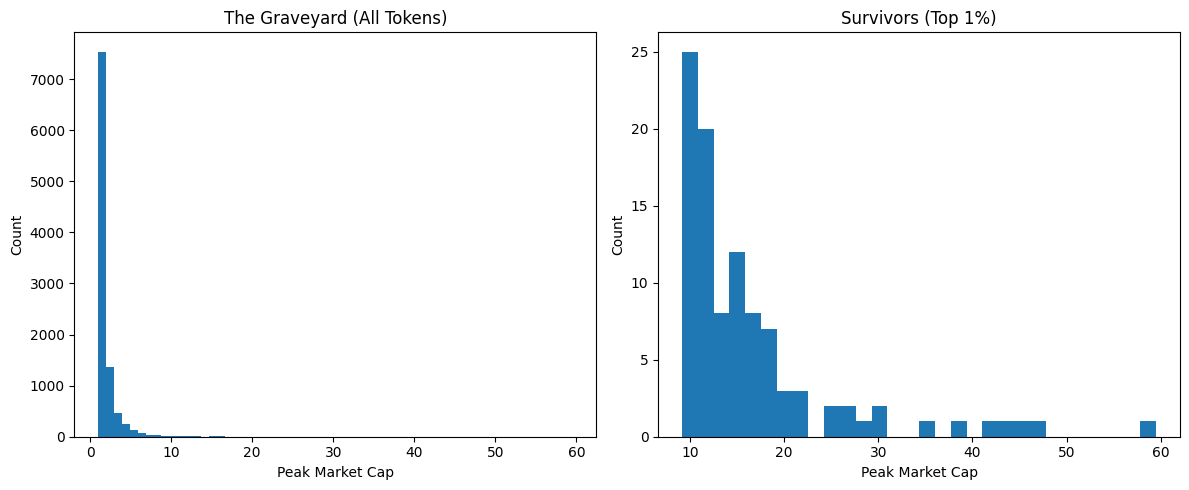

In [58]:
# Survivorship Bias in Crypto: "The Graveyard" vs "Survivors"
# (Simple simulation, heavy-tail / power-law market caps)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

# -----------------------------
# 1) Simulate 10,000 token launches
# -----------------------------
n_tokens = 10_000

# Pareto (power-law): many near the minimum, few huge winners
alpha = 2.0          # tail thickness (smaller = fatter tail)
m_min = 1.0          # minimum market cap scale (near zero-ish, in $M units if you want)

# Peak Market Cap (in "millions" of dollars, if m_min=1 => $1M minimum)
peak_mc = m_min * (np.random.pareto(alpha, size=n_tokens) + 1)

df_all = pd.DataFrame({
    "token_id": np.arange(1, n_tokens + 1),
    "peak_market_cap": peak_mc
})

# -----------------------------
# 2) Survivors = Top 1% only
# -----------------------------
threshold = df_all["peak_market_cap"].quantile(0.99)
df_survivors = df_all[df_all["peak_market_cap"] >= threshold].copy()

# -----------------------------
# 3) Evaluate: Mean market cap (shows bias)
# -----------------------------
mean_all = df_all["peak_market_cap"].mean()
mean_survivors = df_survivors["peak_market_cap"].mean()

print("=== Survivorship Bias Audit ===")
print(f"Tokens launched (df_all): {len(df_all)}")
print(f"Survivors (top 1%):       {len(df_survivors)}")
print(f"Mean Peak MC (All):       {mean_all:.3f}")
print(f"Mean Peak MC (Survivors): {mean_survivors:.3f}")
print(f"Survivor mean is {mean_survivors/mean_all:.1f}x larger than overall mean.")

# -----------------------------
# 4) Visualize: Dual histograms
# -----------------------------
plt.figure(figsize=(12, 5))

# Left: Graveyard (all tokens)
plt.subplot(1, 2, 1)
plt.hist(df_all["peak_market_cap"], bins=60)
plt.title("The Graveyard (All Tokens)")
plt.xlabel("Peak Market Cap")
plt.ylabel("Count")

# Right: Survivors only (top 1%)
plt.subplot(1, 2, 2)
plt.hist(df_survivors["peak_market_cap"], bins=30)
plt.title("Survivors (Top 1%)")
plt.xlabel("Peak Market Cap")
plt.ylabel("Count")

plt.tight_layout()
plt.show()
